In [1]:
# Importing Packages

import pandas as pd
from patsy import dmatrices
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
# Reading the dataset
data_tests = pd.read_csv('Country-wise_data_testing_information/2nd May/Austria_data.csv')
data_policy = pd.read_csv('Cases_and_policies_Country_wise/2nd May/Austria_Covid_Policies.csv')

In [3]:
data_tests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 7 columns):
date            124 non-null object
location        124 non-null object
new_cases       124 non-null int64
new_deaths      124 non-null int64
total_cases     124 non-null int64
total_deaths    124 non-null int64
total_tests     124 non-null int64
dtypes: int64(5), object(2)
memory usage: 6.9+ KB


In [4]:
data_policy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 14 columns):
Unnamed: 0                       124 non-null int64
date                             124 non-null object
location                         124 non-null object
new_cases                        124 non-null int64
new_deaths                       124 non-null int64
total_cases                      124 non-null int64
total_deaths                     124 non-null int64
Date                             124 non-null object
Lockdown                         124 non-null float64
Public_Health                    124 non-null float64
Governance_and_socio-economic    124 non-null float64
Humanitarian_exemption           124 non-null float64
Social_distancing                124 non-null float64
Movement_restrictions            124 non-null float64
dtypes: float64(6), int64(5), object(3)
memory usage: 13.6+ KB


In [5]:
# Converting the datatype of dates to datetime
dates = pd.to_datetime(data_policy['date'], format = '%Y-%m-%d')
# Adding dates to the dataframe
data_policy['Date'] = dates

# Reading the dataset
#data = pd.read_csv('Country-wise_data_testing_information/Austria_data.csv')

# Converting the datatype of dates to datetime
dates = pd.to_datetime(data_tests['date'], format = '%Y-%m-%d')

# Adding dates to the dataframe
data_tests['Date'] = dates

# Removing the original object datatype
# data = data.drop(labels = ['day'], axis = 1)

In [6]:
data_tests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 8 columns):
date            124 non-null object
location        124 non-null object
new_cases       124 non-null int64
new_deaths      124 non-null int64
total_cases     124 non-null int64
total_deaths    124 non-null int64
total_tests     124 non-null int64
Date            124 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 7.8+ KB


In [7]:
data_policy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 14 columns):
Unnamed: 0                       124 non-null int64
date                             124 non-null object
location                         124 non-null object
new_cases                        124 non-null int64
new_deaths                       124 non-null int64
total_cases                      124 non-null int64
total_deaths                     124 non-null int64
Date                             124 non-null datetime64[ns]
Lockdown                         124 non-null float64
Public_Health                    124 non-null float64
Governance_and_socio-economic    124 non-null float64
Humanitarian_exemption           124 non-null float64
Social_distancing                124 non-null float64
Movement_restrictions            124 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(5), object(2)
memory usage: 13.6+ KB


In [8]:
# Dataset Preprocessing before running the model
def dataset_preprocess_policy(df):
    
    # Setting date as the index of the dataframe
    df = df.set_index('Date')
    
    #Creating different columns with regressor variables
    ds = df.index.to_series()
    df['Day'] = ds.dt.day
    df['Month'] = ds.dt.month
    df['Weekday'] = ds.dt.dayofweek
    df['Year'] = ds.dt.year
    
    # Dropping the text columns which have same entries at each row
    #df = df.drop(['Country', 'day', 'Country Name', 'Region','Unnamed: 0', ], axis = 1)
    df = df.drop(['Unnamed: 0','date','location','new_cases', 'new_deaths','total_cases','total_deaths'], axis = 1)
    df = df.drop(df.index[len(df)-1])
    
    #return the dataframe
    return(df)

In [9]:
# Dataset Preprocessing before running the model
def dataset_preprocess_tests(df):
    
    # Setting date as the index of the dataframe
    df = df.set_index('Date')
    
    #Creating different columns with regressor variables
#     ds = df.index.to_series()
#     df['Day'] = ds.dt.day
#     df['Month'] = ds.dt.month
#     df['Weekday'] = ds.dt.dayofweek
#     df['Year'] = ds.dt.year
    
    # Dropping the text columns which have same entries at each row
    df = df.drop(['date'], axis = 1)
#     df = df.drop([ 'countriesAndTerritories','geoId', 'dateRep', 'countryterritoryCode', 'cases', 'deaths'], axis = 1)
    #df = df.drop(df.index[len(df)-1])
    
    #return the dataframe
    return(df)

In [10]:
data_policy = dataset_preprocess_policy(data_policy)
data_tests = dataset_preprocess_tests(data_tests)

In [11]:
merge = pd.merge(data_tests,data_policy, how='inner', left_index=True, right_index=True)

In [12]:
merge_updated = merge[merge['total_cases']>2]

In [13]:
merge_updated.head()

,location,new_cases,new_deaths,total_cases,total_deaths,total_tests,Lockdown,Public_Health,Governance_and_socio-economic,Humanitarian_exemption,Social_distancing,Movement_restrictions,Day,Month,Weekday,Year
Date,,,,,,,,,,,,,,,,
2020-02-28,Austria,3,0,5,0,316,0.0,0.0,0.0,0.0,0.0,0.0,28,2,4,2020
2020-02-29,Austria,2,0,7,0,886,0.0,0.0,0.0,0.0,0.0,0.0,29,2,5,2020
2020-03-01,Austria,3,0,10,0,104,0.0,0.0,0.0,0.0,0.0,0.0,1,3,6,2020
2020-03-02,Austria,4,0,14,0,127,0.0,0.0,0.0,0.0,0.0,0.0,2,3,0,2020
2020-03-03,Austria,4,0,18,0,317,0.0,0.0,0.0,0.0,0.0,0.0,3,3,1,2020


In [14]:
merge_updated = merge_updated.reset_index()

In [15]:
len(merge_updated)

64

In [16]:
Days_since_start = np.arange(1,len(merge_updated)+1)
merge_updated['days_completed'] = Days_since_start

In [17]:
merge_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 18 columns):
Date                             64 non-null datetime64[ns]
location                         64 non-null object
new_cases                        64 non-null int64
new_deaths                       64 non-null int64
total_cases                      64 non-null int64
total_deaths                     64 non-null int64
total_tests                      64 non-null int64
Lockdown                         64 non-null float64
Public_Health                    64 non-null float64
Governance_and_socio-economic    64 non-null float64
Humanitarian_exemption           64 non-null float64
Social_distancing                64 non-null float64
Movement_restrictions            64 non-null float64
Day                              64 non-null int64
Month                            64 non-null int64
Weekday                          64 non-null int64
Year                             64 non-null int64
days_com

In [18]:
merge_updated.head()

,Date,location,new_cases,new_deaths,total_cases,total_deaths,total_tests,Lockdown,Public_Health,Governance_and_socio-economic,Humanitarian_exemption,Social_distancing,Movement_restrictions,Day,Month,Weekday,Year,days_completed
0,2020-02-28,Austria,3,0,5,0,316,0.0,0.0,0.0,0.0,0.0,0.0,28,2,4,2020,1
1,2020-02-29,Austria,2,0,7,0,886,0.0,0.0,0.0,0.0,0.0,0.0,29,2,5,2020,2
2,2020-03-01,Austria,3,0,10,0,104,0.0,0.0,0.0,0.0,0.0,0.0,1,3,6,2020,3
3,2020-03-02,Austria,4,0,14,0,127,0.0,0.0,0.0,0.0,0.0,0.0,2,3,0,2020,4
4,2020-03-03,Austria,4,0,18,0,317,0.0,0.0,0.0,0.0,0.0,0.0,3,3,1,2020,5


In [19]:
merge_updated.to_csv('Data/2nd May/Austria_Covid.csv')

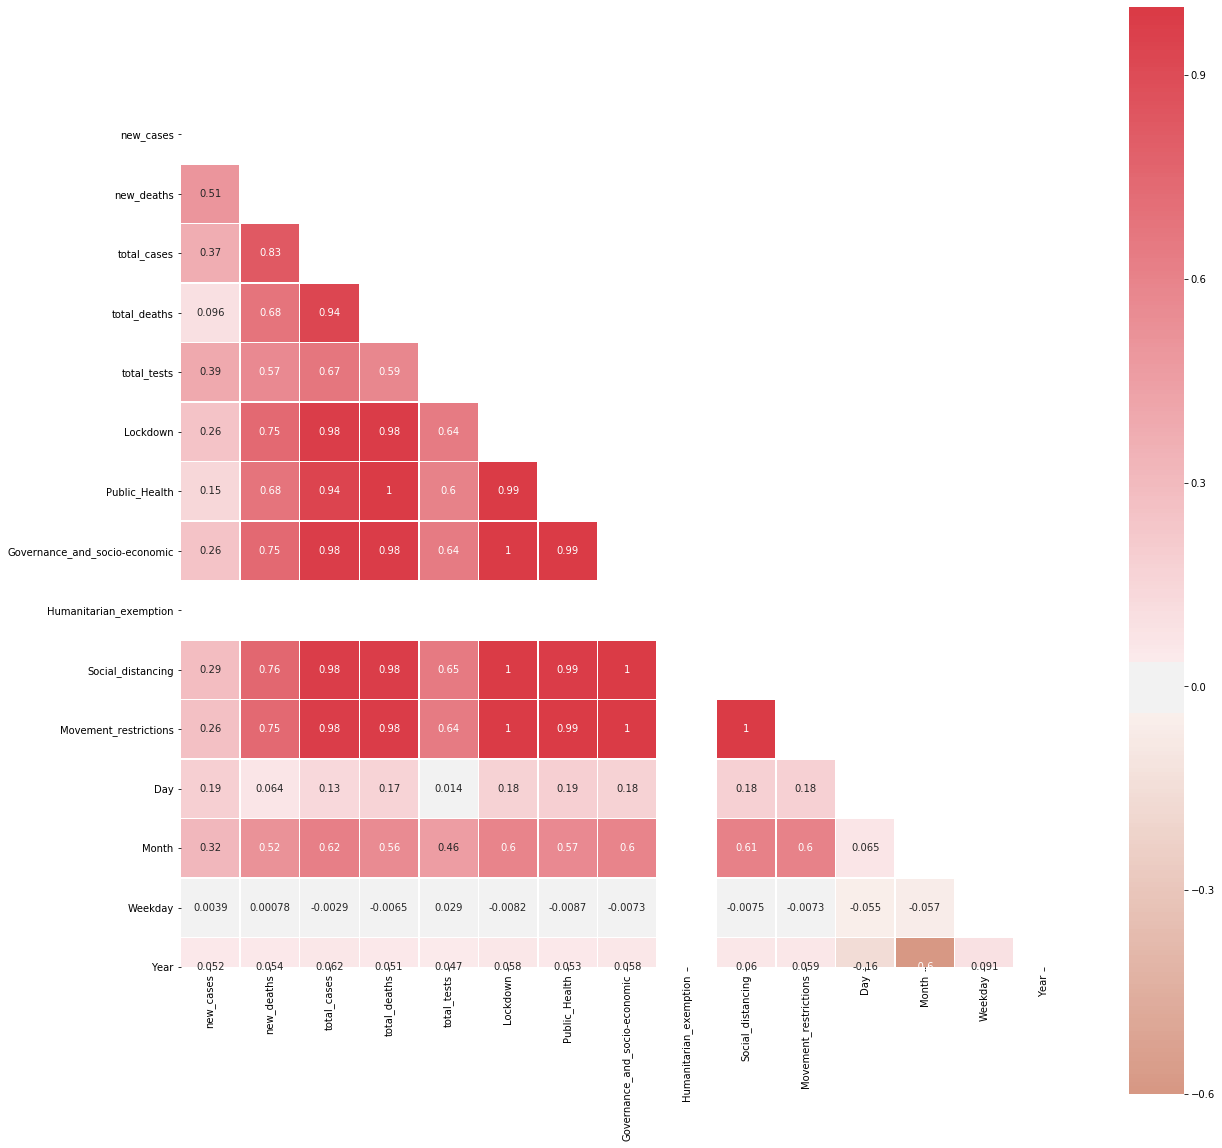

In [20]:
# Compute the correlation matrix
corr = merge.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 40))

# Generate a custom diverging colormap
cmap = sn.diverging_palette(22, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask, annot = True, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})